# Regressão linear simples

## Base plano de saúde

In [325]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [326]:
base_plano_saude = pd.read_csv('../content/plano_saude.csv')
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [327]:
x_plano_saude = base_plano_saude.iloc[:, 0].values
y_plano_saude = base_plano_saude.iloc[:, 1].values

x_plano_saude, y_plano_saude

(array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64),
 array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090],
       dtype=int64))

In [328]:
np.corrcoef(x_plano_saude, y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [329]:
x_plano_saude.shape, y_plano_saude.shape

((10,), (10,))

In [330]:
x_plano_saude = x_plano_saude.reshape(-1, 1)
x_plano_saude.shape

(10, 1)

In [331]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(x_plano_saude, y_plano_saude)

LinearRegression()

In [332]:
# b0
regressor_plano_saude.intercept_

-558.9490909090912

In [333]:
# b1
regressor_plano_saude.coef_

array([61.86787879])

In [334]:
previsoes = regressor_plano_saude.predict(x_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [335]:
grafico = px.scatter(x=x_plano_saude.ravel(), y=y_plano_saude)
grafico.add_scatter(x=x_plano_saude.ravel(), y=previsoes, name='Regressão')
grafico.show()

In [336]:
regressor_plano_saude.intercept_ + regressor_plano_saude.coef_ * 18

array([554.67272727])

In [337]:
regressor_plano_saude.score(x_plano_saude, y_plano_saude)

0.8666112727879174

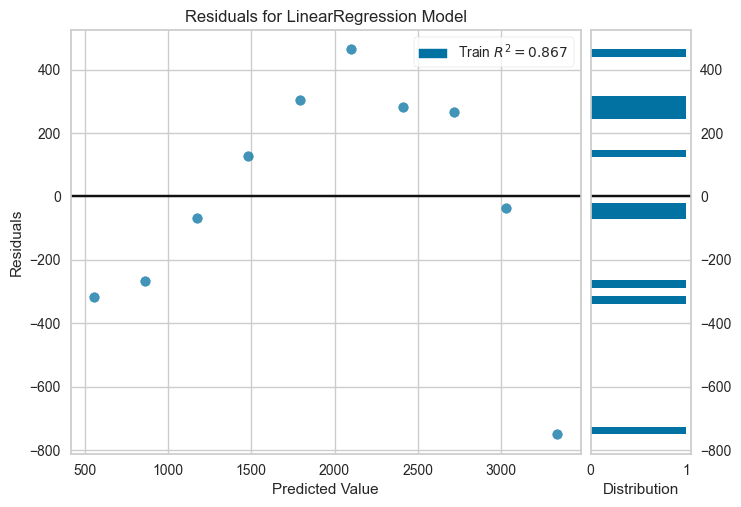

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [338]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(x_plano_saude, y_plano_saude)
visualizador.poof()

## Base preço das casas

In [339]:
base_casas = pd.read_csv('../content/house_prices.csv')
base_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [340]:
base_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [341]:
base_casas.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [342]:
base_casas.drop('date', axis='columns', inplace=True) # Removendo a coluna date
base_casas.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


<Axes: >

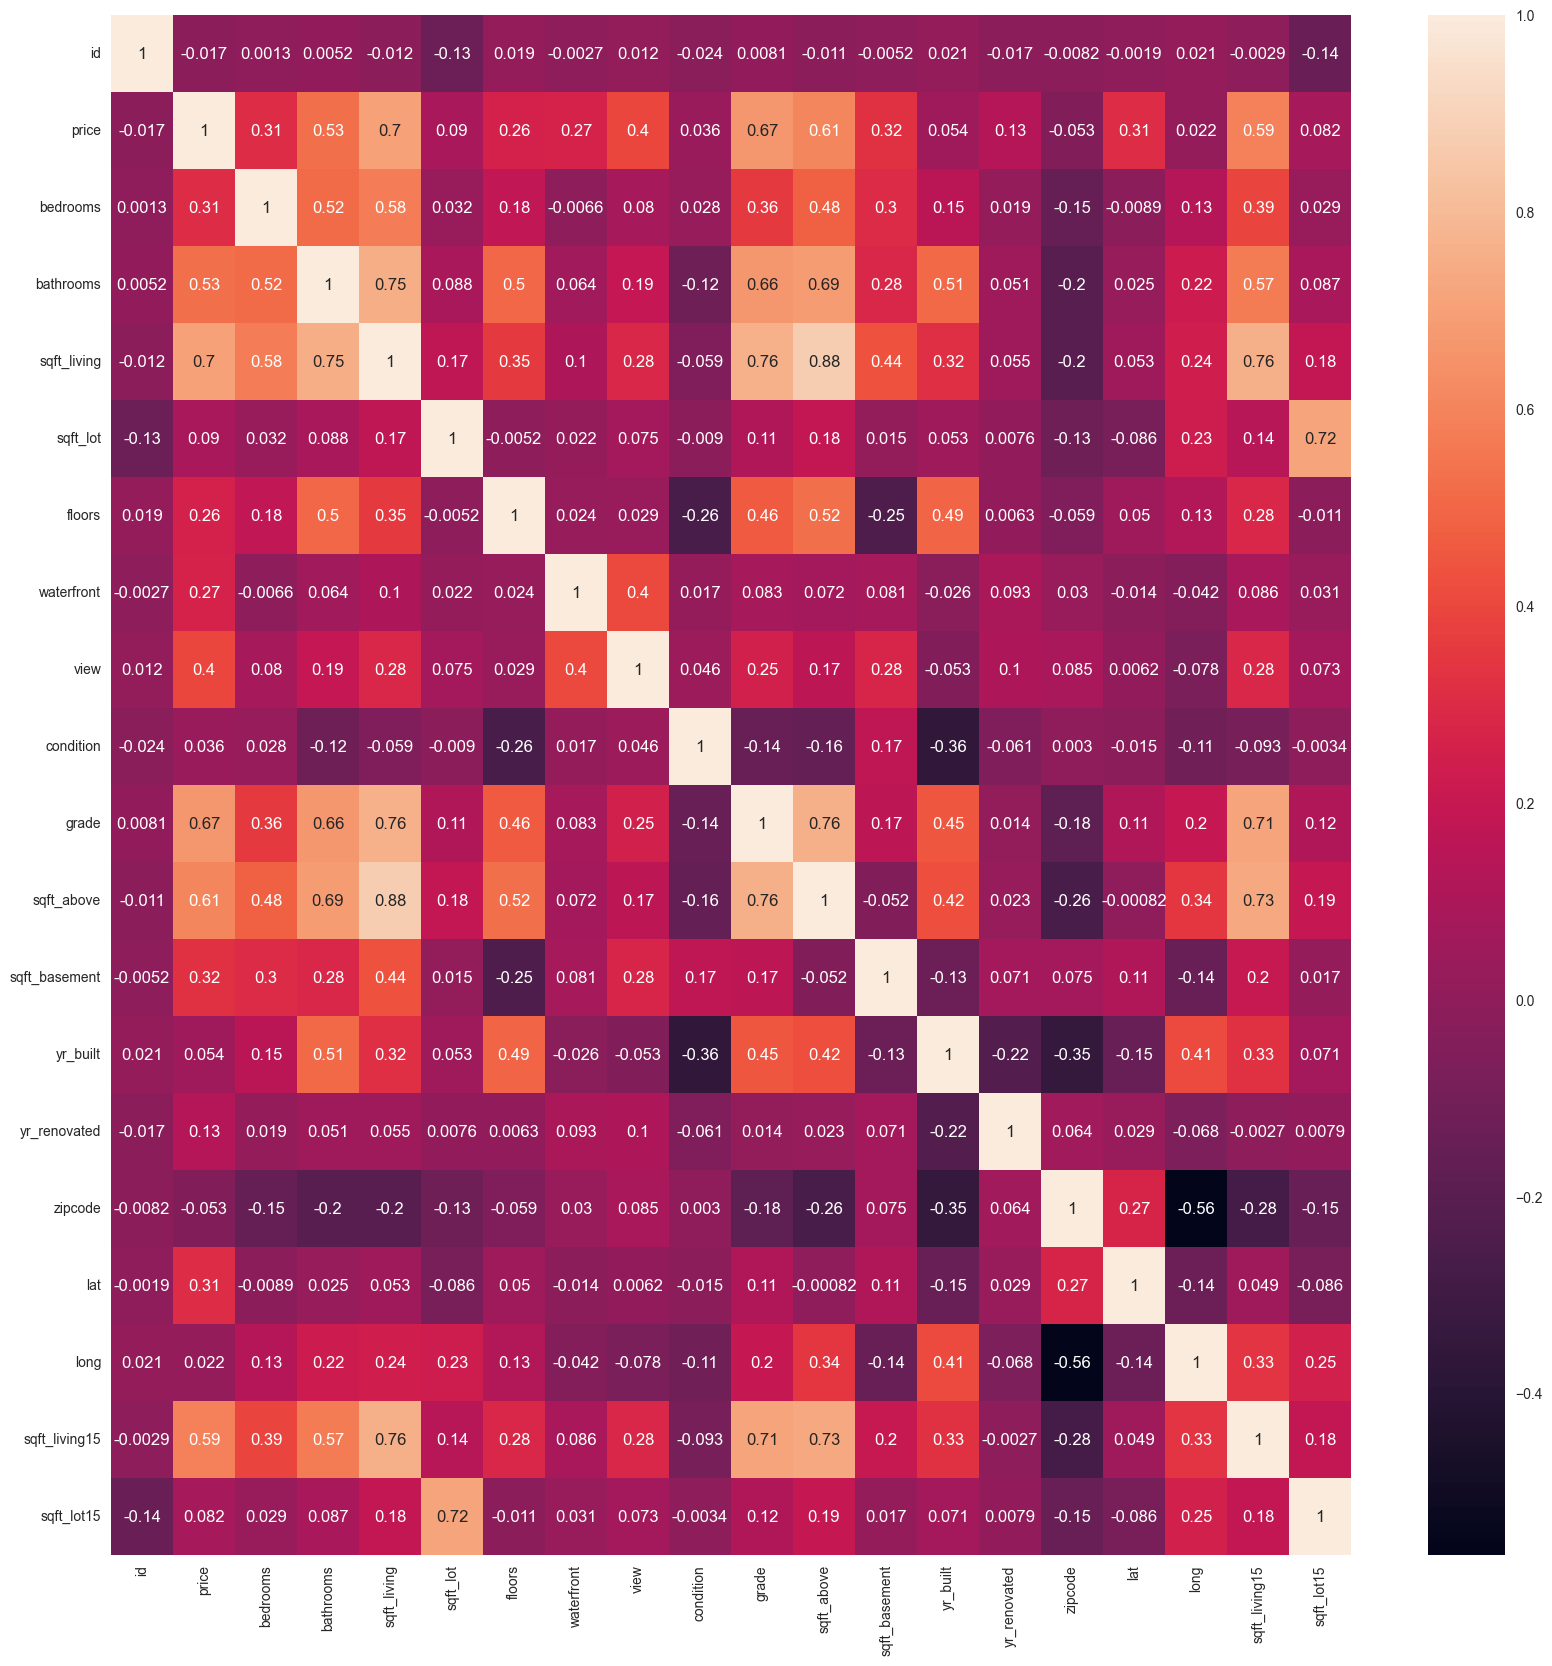

In [343]:
figura = plt.figure(figsize=(20, 20))
sns.heatmap(base_casas.corr(), annot=True)

In [344]:
x_casas = base_casas.iloc[:, 4:5].values
x_casas

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [345]:
y_casas = base_casas.iloc[:, 1].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [346]:
from sklearn.model_selection import train_test_split
x_casas_treinamento, x_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(x_casas, y_casas, test_size=0.3, random_state=0)

In [347]:
x_casas_treinamento.shape, y_casas_treinamento.shape, x_casas_teste.shape, y_casas_teste.shape

((15129, 1), (15129,), (6484, 1), (6484,))

In [348]:
from sklearn.linear_model import LinearRegression
regressor_simples_casas = LinearRegression()
regressor_simples_casas.fit(x_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [349]:
# B0
regressor_simples_casas.intercept_

-37893.59850106703

In [350]:
# B1
regressor_simples_casas.coef_

array([278.32860644])

In [351]:
regressor_simples_casas.score(x_casas_treinamento, y_casas_treinamento)

0.49453356717789776

In [352]:
regressor_simples_casas.score(x_casas_teste, y_casas_teste)

0.48889929019453016

In [353]:
previsoes = regressor_simples_casas.predict(x_casas_treinamento)
previsoes

array([348983.16445268, 365682.88083917, 758126.21592175, ...,
       618961.91270098, 621745.1987654 , 624528.48482981])

In [354]:
grafico = px.scatter(x=x_casas_treinamento.ravel(), y=previsoes)
grafico.show()

In [355]:
grafico1 = px.scatter(x=x_casas_treinamento.ravel(), y=y_casas_treinamento)
grafico2 = px.line(x=x_casas_treinamento.ravel(), y=previsoes)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3.show()

In [356]:
previsoes_teste = regressor_simples_casas.predict(x_casas_teste)
previsoes_teste

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

In [357]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [358]:
abs(y_casas_teste - previsoes_teste).mean()

172604.12889995414

In [359]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [360]:
mean_absolute_error(y_casas_teste, previsoes_teste)

172604.12889995414

In [361]:
mean_squared_error(y_casas_teste, previsoes_teste)

70170013932.11592

In [362]:
np.sqrt(mean_squared_error(y_casas_teste, previsoes_teste))

264896.23238565685

In [363]:
grafico1 = px.scatter(x=x_casas_teste.ravel(), y=y_casas_teste)
grafico2 = px.line(x=x_casas_teste.ravel(), y=previsoes_teste)
grafico2.data[0].line.color = 'red'
grafico3 = go.Figure(data=grafico1.data + grafico2.data)
grafico3.show()

# Regessão Múltipla

## Base preços das casas

In [364]:
base_casas

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [365]:
x_casas = base_casas.iloc[:, 2:18].values
x_casas

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

In [366]:
y_casas = base_casas.iloc[:, 1].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [367]:
from sklearn.model_selection import train_test_split
x_casas_treinamento, x_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(x_casas, y_casas, test_size=0.3, random_state=0)

In [368]:
x_casas_treinamento.shape, y_casas_treinamento.shape, x_casas_teste.shape, y_casas_teste.shape

((15129, 16), (15129,), (6484, 16), (6484,))

In [369]:
regressor_multiplo_casas = LinearRegression()
regressor_multiplo_casas.fit(x_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [370]:
# B0
regressor_multiplo_casas.intercept_

5736222.703412161

In [371]:
# B1, B2, B3, ..., B16
regressor_multiplo_casas.coef_

array([-3.08423090e+04,  3.66540816e+04,  1.12179158e+02,  8.00604120e-03,
        9.60355724e+03,  5.85441638e+05,  5.60621840e+04,  2.54795004e+04,
        1.01092121e+05,  6.96565321e+01,  4.25226267e+01, -2.60724691e+03,
        1.40070753e+01, -5.53557431e+02,  6.11778251e+05, -1.95564688e+05])

In [372]:
regressor_multiplo_casas.score(x_casas_treinamento, y_casas_treinamento)

0.7029888085955007

In [373]:
regressor_multiplo_casas.score(x_casas_teste, y_casas_teste)

0.6885414149062644

In [374]:
previsoes = regressor_multiplo_casas.predict(x_casas_teste)
previsoes

array([ 383751.77768702, 1514216.17517451,  546921.96179115, ...,
        314968.5762327 ,  219405.55573559,  148128.83467043])

In [375]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [376]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste, previsoes)

123888.44377485868

In [377]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_casas_teste, previsoes)

42760757001.53654

# Regressão linear polinomial

## Base de Saúde

In [378]:
base_plano_saude2 = pd.read_csv('../content/plano_saude2.csv')
base_plano_saude2

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150
5,43,1530
6,48,2040
7,53,3080
8,58,5100
9,63,10100


In [379]:
x_plano_saude2 = base_plano_saude2.iloc[:, 0:1].values
y_plano_saude2 = base_plano_saude2.iloc[:, 1].values

x_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [380]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100], dtype=int64)

In [381]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
x_plano_saude2_poly = poly.fit_transform(x_plano_saude2)

x_plano_saude2.shape, x_plano_saude2_poly.shape

((10, 1), (10, 5))

In [382]:
regressor_saude_poly = LinearRegression()
regressor_saude_poly.fit(x_plano_saude2_poly, y_plano_saude2)

LinearRegression()

In [383]:
# B0
regressor_saude_poly.intercept_

16561.974637941225

In [384]:
# B1 ... Bn
regressor_saude_poly.coef_

array([ 0.00000000e+00, -2.12242253e+03,  9.90404199e+01, -1.95058276e+00,
        1.40792541e-02])

In [385]:
novo = [[40]]
novo = poly.transform(novo)
regressor_saude_poly.predict(novo)

array([1335.33958016])

In [386]:
previsoes = regressor_saude_poly.predict(x_plano_saude2_poly)
previsoes

array([ 549.65035466,  345.85081577,  616.53845994,  975.83915951,
       1249.06759854, 1472.72727271, 1894.51048941, 2973.29836768,
       5379.16083826, 9993.35664352])

In [387]:
grafico = px.scatter(x=x_plano_saude2[:, 0], y=y_plano_saude2)
grafico.add_scatter(x=x_plano_saude2[:, 0], y=previsoes, name='Regressão Polinomial')
grafico.show()

## Base preço das casas

In [388]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_casas_treinamento_poly = poly.fit_transform(x_casas_treinamento)
x_casas_teste_poly = poly.transform(x_casas_teste)

In [389]:
regressor_casas_poly = LinearRegression()
regressor_casas_poly.fit(x_casas_treinamento_poly, y_casas_treinamento)

LinearRegression()

In [390]:
regressor_casas_poly.score(x_casas_treinamento_poly, y_casas_treinamento)

0.7924863532435756

In [391]:
regressor_casas_poly.score(x_casas_teste_poly, y_casas_teste)

0.7945486450062598

In [392]:
previsoes = regressor_casas_poly.predict(x_casas_teste_poly)
previsoes

array([ 442197.0160252 , 1956399.3016603 ,  576589.99247741, ...,
        350582.46310049,  246776.52417187,  221178.81496017])

In [393]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [394]:
mean_absolute_error(y_casas_teste, previsoes)

105307.16380024166

In [395]:
mean_squared_error(y_casas_teste, previsoes)

28206817493.503227

# Regressão com árvores de decisão

## Base plano de saúde

In [396]:
x_plano_saude2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [397]:
y_plano_saude2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100], dtype=int64)

In [398]:
from sklearn.tree import DecisionTreeRegressor
regressor_arvore_saude = DecisionTreeRegressor()
regressor_arvore_saude.fit(x_plano_saude2, y_plano_saude2)

DecisionTreeRegressor()

In [399]:
previsoes = regressor_arvore_saude.predict(x_plano_saude2)
previsoes

array([  470.,   520.,   630.,   830.,  1150.,  1530.,  2040.,  3080.,
        5100., 10100.])

In [400]:
regressor_arvore_saude.score(x_plano_saude2, y_plano_saude2)

1.0

In [401]:
grafico = px.scatter(x=x_plano_saude2.ravel(), y=y_plano_saude2)
grafico.add_scatter(x=x_plano_saude2.ravel(), y=previsoes, name='Árvore de Decisão')
grafico.show()

In [402]:
x_teste_arvore = np.arange(min(x_plano_saude2), max(x_plano_saude2), 0.1)
x_teste_arvore

C:\Users\rafael.soares\AppData\Local\Temp\ipykernel_19620\1425447410.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



array([18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. ,
       19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1,
       20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2,
       21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6,
       25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7,
       26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8,
       27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9,
       29. , 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30. ,
       30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. , 31.1,
       31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32. , 32.1, 32.2,
       32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33

In [403]:
x_teste_arvore = x_teste_arvore.reshape(-1, 1)

In [404]:
grafico = px.scatter(x=x_plano_saude2.ravel(), y=y_plano_saude2)
grafico.add_scatter(x=x_teste_arvore.ravel(), y=regressor_arvore_saude.predict(x_teste_arvore), name='Árvore de Decisão')
grafico.show()

In [405]:
regressor_arvore_saude.predict([[40.6]])

array([1530.])

## Base preço das casas

In [406]:
regressor_arvore_casas = DecisionTreeRegressor()
regressor_arvore_casas.fit(x_casas_treinamento, y_casas_treinamento)

DecisionTreeRegressor()

In [407]:
regressor_arvore_casas.score(x_casas_treinamento, y_casas_treinamento)

0.9992712177726063

In [408]:
regressor_arvore_casas.score(x_casas_teste, y_casas_teste)

0.745877932083656

In [409]:
previsoes = regressor_arvore_casas.predict(x_casas_teste)
previsoes

array([ 288000., 1980000.,  480000., ...,  289000.,  197000.,  201000.])

In [410]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [411]:
mean_absolute_error(y_casas_teste, previsoes)

99290.24961443554

# Regressão com random forest

## Base plano de saúde

In [412]:
from sklearn.ensemble import RandomForestRegressor
regressor_random_forest_saude = RandomForestRegressor(n_estimators=10)
regressor_random_forest_saude.fit(x_plano_saude2, y_plano_saude2)

RandomForestRegressor(n_estimators=10)

In [413]:
regressor_random_forest_saude.score(x_plano_saude2, y_plano_saude2)

0.9802334843997772

In [414]:
previsoes = regressor_random_forest_saude.predict(x_teste_arvore)
previsoes

array([ 537.,  537.,  537.,  537.,  537.,  537.,  537.,  537.,  537.,
        537.,  537.,  537.,  537.,  537.,  537.,  537.,  537.,  537.,
        537.,  537.,  537.,  537.,  537.,  537.,  537.,  537.,  542.,
        542.,  542.,  542.,  542.,  542.,  542.,  542.,  542.,  542.,
        542.,  542.,  542.,  542.,  542.,  542.,  542.,  542.,  542.,
        542.,  542.,  542.,  542.,  542.,  542.,  590.,  590.,  590.,
        590.,  590.,  590.,  590.,  590.,  590.,  590.,  590.,  590.,
        590.,  590.,  590.,  590.,  590.,  590.,  590.,  590.,  590.,
        590.,  590.,  590.,  590.,  623.,  623.,  623.,  623.,  623.,
        623.,  623.,  623.,  623.,  623.,  623.,  623.,  623.,  623.,
        623.,  623.,  623.,  623.,  623.,  623.,  623.,  623.,  623.,
        623.,  623.,  722.,  722.,  722.,  722.,  722.,  722.,  722.,
        722.,  722.,  722.,  722.,  722.,  722.,  722.,  722.,  722.,
        722.,  722.,  722.,  722.,  722.,  722.,  722.,  722.,  722.,
        842.,  842.,

In [415]:
grafico = px.scatter(x=x_plano_saude2.ravel(), y=y_plano_saude2)
grafico.add_scatter(x=x_teste_arvore.ravel(), y=previsoes, name='Random Forest')
grafico.show()

In [416]:
regressor_random_forest_saude.predict([[40]])

array([1264.])

## Base preço das casas

In [417]:
regressor_random_forest_casas = RandomForestRegressor(n_estimators=100)
regressor_random_forest_casas.fit(x_casas_treinamento, y_casas_treinamento)

RandomForestRegressor()

In [418]:
regressor_random_forest_casas.score(x_casas_treinamento, y_casas_treinamento)

0.9818804643056375

In [419]:
regressor_random_forest_casas.score(x_casas_teste, y_casas_teste)

0.8826788294977288

In [420]:
previsoes = regressor_random_forest_casas.predict(x_casas_teste)
previsoes

array([ 301897.58      , 1749007.3       ,  538818.41      , ...,
        371868.54666667,  231661.14      ,  208664.3       ])

In [421]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [422]:
mean_absolute_error(y_casas_teste, previsoes)

67625.14922745244

# SVR (Support Vector Regression)

## Base plano de saúde

In [423]:
from sklearn.svm import SVR

### Kernel linear

In [424]:
regressor_svr_saude_linear = SVR(kernel='linear')
regressor_svr_saude_linear.fit(x_plano_saude2, y_plano_saude2)

SVR(kernel='linear')

In [425]:
previsoes = regressor_svr_saude_linear.predict(x_plano_saude2)
previsoes

array([ 216.14,  520.1 ,  824.06, 1128.02, 1431.98, 1735.94, 2039.9 ,
       2343.86, 2647.82, 2951.78])

In [426]:
grafico = px.scatter(x=x_plano_saude2.ravel(), y=y_plano_saude2)
grafico.add_scatter(x=x_plano_saude2.ravel(), y=previsoes, name='SVR Linear')
grafico.show()

### Kernel polinomial

In [427]:
regressor_svr_saude_poly = SVR(kernel='poly', degree=4)
regressor_svr_saude_poly.fit(x_plano_saude2, y_plano_saude2)

SVR(degree=4, kernel='poly')

In [428]:
previsoes = regressor_svr_saude_poly.predict(x_plano_saude2)
previsoes

array([ 374.50717518,  448.20866505,  589.32532264,  830.10010095,
       1209.09810062, 1771.20656992, 2567.63490479, 3655.91464879,
       5099.89949316, 6969.76527674])

In [429]:
grafico = px.scatter(x=x_plano_saude2.ravel(), y=y_plano_saude2)
grafico.add_scatter(x=x_plano_saude2.ravel(), y=previsoes, name='SVR Poly')
grafico.show()

### Kernel rbf

In [450]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x_plano_saude2_scaled = scaler_x.fit_transform(x_plano_saude2)
scaler_y = StandardScaler()
y_plano_saude2_scaled = scaler_y.fit_transform(y_plano_saude2.reshape(-1, 1))

In [451]:
regressor_svr_saude_rbf = SVR(kernel='rbf')
regressor_svr_saude_rbf.fit(x_plano_saude2_scaled, y_plano_saude2_scaled.ravel())

SVR()

In [452]:
previsoes = regressor_svr_saude_rbf.predict(x_plano_saude2_scaled)
previsoes

array([-0.62348071, -0.63291278, -0.57066507, -0.49866508, -0.44637596,
       -0.36326797, -0.13553889,  0.29353246,  0.79122818,  1.09382968])

In [453]:
grafico = px.scatter(x=x_plano_saude2_scaled.ravel(), y=y_plano_saude2_scaled.ravel())
grafico.add_scatter(x=x_plano_saude2_scaled.ravel(), y=previsoes, name='SVR rbf')
grafico.show()

In [459]:
novo = [[40]]
novo = scaler_x.transform(novo)
previsao = regressor_svr_saude_rbf.predict(novo)
previsao = previsao.reshape(-1, 1)
scaler_y.inverse_transform(previsao)

array([[1333.85650748]])

## Base preço das casas

In [461]:
from sklearn.preprocessing import StandardScaler
scaler_x_casas = StandardScaler()
x_casas_treinamento_scaled = scaler_x_casas.fit_transform(x_casas_treinamento)
scaler_y_casas = StandardScaler()
y_casas_treinamento_scaled = scaler_y_casas.fit_transform(y_casas_treinamento.reshape(-1, 1))

In [462]:
x_casas_teste_scaled = scaler_x_casas.transform(x_casas_teste)
y_casas_teste_scaled = scaler_y_casas.transform(y_casas_teste.reshape(-1, 1))

In [465]:
regressor_svr_casas = SVR(kernel='rbf')
regressor_svr_casas.fit(x_casas_treinamento_scaled, y_casas_treinamento_scaled.ravel())

SVR()

In [466]:
regressor_svr_casas.score(x_casas_treinamento_scaled, y_casas_treinamento_scaled.ravel())

0.8123337393146999

In [467]:
regressor_svr_casas.score(x_casas_teste_scaled, y_casas_teste_scaled.ravel())

0.7374454724624955

In [468]:
previsoes = regressor_svr_casas.predict(x_casas_teste_scaled)
previsoes

array([-0.54571552,  3.46454238,  0.02286424, ..., -0.46405796,
       -0.91113329, -1.03334346])

In [469]:
y_casas_teste_scaled

array([[-0.66623646],
       [ 2.83715179],
       [ 0.05878167],
       ...,
       [-0.43924097],
       [-0.74554814],
       [-0.91511104]])

In [471]:
y_casas_teste_inverse = scaler_y_casas.inverse_transform(y_casas_teste_scaled)
previsoes_inverse = scaler_y_casas.inverse_transform(previsoes.reshape(-1, 1))

In [472]:
previsoes_inverse

array([[ 341068.00437506],
       [1807402.87779178],
       [ 548966.93331463],
       ...,
       [ 370925.76457821],
       [ 207454.44649635],
       [ 162768.78477289]])

In [473]:
y_casas_teste_inverse

array([[ 297000.],
       [1578000.],
       [ 562100.],
       ...,
       [ 380000.],
       [ 268000.],
       [ 206000.]])

In [474]:
mean_absolute_error(y_casas_teste_inverse, previsoes_inverse)

82453.02198930961

# Redes Neurais Artificiais (RNA)

## Base plano de saúde

In [476]:
from sklearn.neural_network import MLPRegressor
regressor_rna_saude = MLPRegressor(max_iter=1000)
regressor_rna_saude.fit(x_plano_saude2_scaled, y_plano_saude2_scaled.ravel())

MLPRegressor(max_iter=1000)

In [477]:
regressor_rna_saude.score(x_plano_saude2_scaled, y_plano_saude2_scaled.ravel())

0.9605445043061607

In [478]:
previsoes = regressor_rna_saude.predict(x_plano_saude2_scaled)
previsoes

array([-0.68330126, -0.69581172, -0.68227414, -0.65028617, -0.55492343,
       -0.3943184 , -0.13394054,  0.36137908,  1.27117421,  2.18094662])

In [481]:
grafico = px.scatter(x=x_plano_saude2_scaled.ravel(), y=y_plano_saude2_scaled.ravel())
grafico.add_scatter(x=x_plano_saude2_scaled.ravel(), y=previsoes, name='RNA')
grafico.show()

In [485]:
novo = [[40]]
novo = scaler_x.transform(novo)
scaler_y.inverse_transform(regressor_rna_saude.predict(novo).reshape(-1, 1))

array([[1117.07339842]])

## Base preço das casas

In [486]:
regressor_rna_casas = MLPRegressor(max_iter=1000, hidden_layer_sizes=(9, 9))
regressor_rna_casas.fit(x_casas_treinamento_scaled, y_casas_treinamento_scaled.ravel())

MLPRegressor(hidden_layer_sizes=(9, 9), max_iter=1000)

In [490]:
regressor_rna_casas.score(x_casas_treinamento_scaled, y_casas_treinamento_scaled)

0.8991437766508649

In [492]:
regressor_rna_casas.score(x_casas_teste_scaled, y_casas_teste_scaled)

0.8861089220268652

In [493]:
previsoes = regressor_rna_casas.predict(x_casas_teste_scaled)
previsoes

array([-0.56418245,  3.12908708, -0.04537844, ..., -0.57203954,
       -0.84603233, -0.89567905])

In [494]:
y_casas_teste_scaled

array([[-0.66623646],
       [ 2.83715179],
       [ 0.05878167],
       ...,
       [-0.43924097],
       [-0.74554814],
       [-0.91511104]])

In [495]:
y_casas_teste_inverse = scaler_y_casas.inverse_transform(y_casas_teste_scaled)
previsoes_inverse = scaler_y_casas.inverse_transform(previsoes.reshape(-1, 1))

In [496]:
y_casas_teste_inverse

array([[ 297000.],
       [1578000.],
       [ 562100.],
       ...,
       [ 380000.],
       [ 268000.],
       [ 206000.]])

In [497]:
previsoes_inverse

array([[ 334315.64345938],
       [1684744.98046969],
       [ 524014.26823345],
       ...,
       [ 331442.73146622],
       [ 231258.35631355],
       [ 213105.22806816]])

In [498]:
mean_absolute_error(y_casas_teste_inverse, previsoes_inverse)

73240.98289640887